In [ ]:
# %pip install -U python-dotenv langgraph langchain-openai -q


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
OPENAI_MODEL = os.getenv("OPENAI_MODEL")
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")

In [ ]:
# %pip install -qU langchain-tavily


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from langchain_tavily import TavilySearch

search_tool = TavilySearch(max_results=2)
search_tool.invoke("LangGraph에서 '노드'란 무엇인가요?")

{'query': "LangGraph에서 '노드'란 무엇인가요?",
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://blog.naver.com/pjt3591oo/223861729229?fromRss=true&trackingCode=rss',
   'title': 'langgraph 소개 및 기본개념 : 네이버 블로그',
   'content': '· 노드(nodes): 그래프의 작업 단위\u200b 노드는 그래프에서 실제 작업을 수행하는 단위입니다. 각 노드는 특정 로직을 담당합니다. 작업은 LLM 호출, 데이터',
   'score': 0.8727061,
   'raw_content': None},
  {'url': 'https://normalstory.tistory.com/entry/LangGraph-01',
   'title': 'LangGraph - 1. 개요 - 청춘만화 - 티스토리',
   'content': "\\지극히 주관적 개요: Devika, Crew AI, phidata를 사용하면서 또는 사용할수록 강하게 느껴지는 점이 하나 있다면 지금 중요한 것은 ’ 프롬프트나 RAG가 아니라 얼마나 Agentic 한 LLM 애플리케이션을 얼마나 Locally 하게 구성할 수 있는가 ‘라고 생각한다. 그리고 프로세스의 '방향'은 프로세스 내 워크의 상태(실행 여부나 그 상태) 정보를 기반으로 이뤄지는데 이러한 일련의 내용은 기본적으로 scratch 코딩과 같이 그래프( workflows, diagram)형태로 표현될 수 있다. 점(node)과 선(edge)으로 표현되는 하나의 다이어그램(graph)에 색(state)과 방향(sign) 정보를 기반으로 프로세스(flow)를 형성하는, 말 그대로 '하나의 워크플로(workflows)'라는 생각이 든다. 그래프를 컴파일을 하기 전에 'entry point'역할을 하는 노드를 지정하고 'end po

In [5]:
from langgraph.prebuilt import create_react_agent
from langchain.chat_models import init_chat_model

llm = init_chat_model("openai:gpt-4o-mini")
agent = create_react_agent(model=llm, tools=[search_tool])

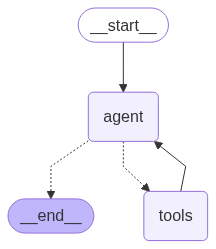

In [6]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

In [7]:
from langchain_core.messages import HumanMessage

response = agent.invoke({
    "messages": [HumanMessage("LangGraph에서 '노드'란 무엇인가요?")]
})

print(response["messages"][-1].content)

LangGraph에서 '노드'는 AI 워크플로우 내에서 개별 구성 요소나 에이전트를 나타내는 요소입니다. 노드는 서로 상호작용하는 "행위자"로 생각할 수 있으며, 특정 작업을 수행하는 데 필요한 기능을 정의합니다. 예를 들어, 사용자의 요청을 처리하거나, 데이터를 업데이트하는 등의 작업을 수행할 수 있습니다.

노드는 Python 함수나 Runnable 객체로 정의되며, 이는 상태 정의에 의해 지정된 유형과 일치해야 합니다. 노드 간의 연결은 '엣지'로 표현되며, 다음에 실행할 노드를 지정합니다. 이 구조를 통해 LangGraph는 복잡한 멀티 에이전트 시스템의 워크플로우를 표현할 수 있습니다.

간단히 말해, LangGraph의 노드는 여러 작업을 수행하는 에이전트의 역할을 하며, 그들 간의 상호작용을 통해 AI 기반의 다양한 프로세스를 구성합니다.


In [8]:
for chunk in agent.stream(
    {"messages": {
        "role": "user",
        "content": "LangGraph에서 '노드'란 무엇인가요?"
    }},
    stream_mode="updates"
    # stream_mode="messages"    # token 단위로 스트리밍 (기본값)
):
    print(chunk)
    print("\n")

{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_FHMVJ1sgiDceJ2bFM0OwOZcL', 'function': {'arguments': '{"query":"LangGraph 노드","search_depth":"advanced"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 779, 'total_tokens': 803, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BnIhlWcJeObu1hpD0aoyESjW8NIRH', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a980b1e4-7fae-43a1-a41c-4592f547ad04-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'LangGraph 노드', 'search_depth': 'advanced'}, 'id': 'call_FHMVJ1sgiDceJ2bFM0OwOZcL', 'type': 'tool_call'}], usage_me